## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Random Forests

### Review Decision Tree

#### How does the Algorithm work?   


    1.For each feature, determine the best threshold for splitting
    2.Determine the best feature-threshold pair
    3.Create two child nodes
    4.Split the data points across child nodes
    5.For each node, start again from 1.
    6.If subset is pure or max_depth is reached STOP



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('penguins_simple.csv', sep=';')

In [3]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [4]:
train, test = train_test_split(df)

#### 1. Inspect the shape of the train and test DataFrames

In [5]:
train.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
200,Chinstrap,42.5,17.3,187.0,3350.0,FEMALE
0,Adelie,39.1,18.7,181.0,3750.0,MALE
21,Adelie,40.6,18.6,183.0,3550.0,MALE
51,Adelie,40.6,18.8,193.0,3800.0,MALE
103,Adelie,43.2,19.0,197.0,4775.0,MALE


In [6]:
train.shape

(249, 6)

### Train a Baseline Model

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# we can extract columns only now, because we want to sample below
Xtrain = train[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
ytrain = train['Species']
Xtest = test[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
ytest = test['Species']

#### 2. Train a Decision Tree with maximum depth 3

In [9]:
m = DecisionTreeClassifier(max_depth=3)
m.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

#### 3. Calculate training and test accuracy

In [10]:
print('train acc', round(m.score(Xtrain, ytrain), 3))
print('test acc ', round(m.score(Xtest, ytest), 3))

train acc 0.984
test acc  0.917


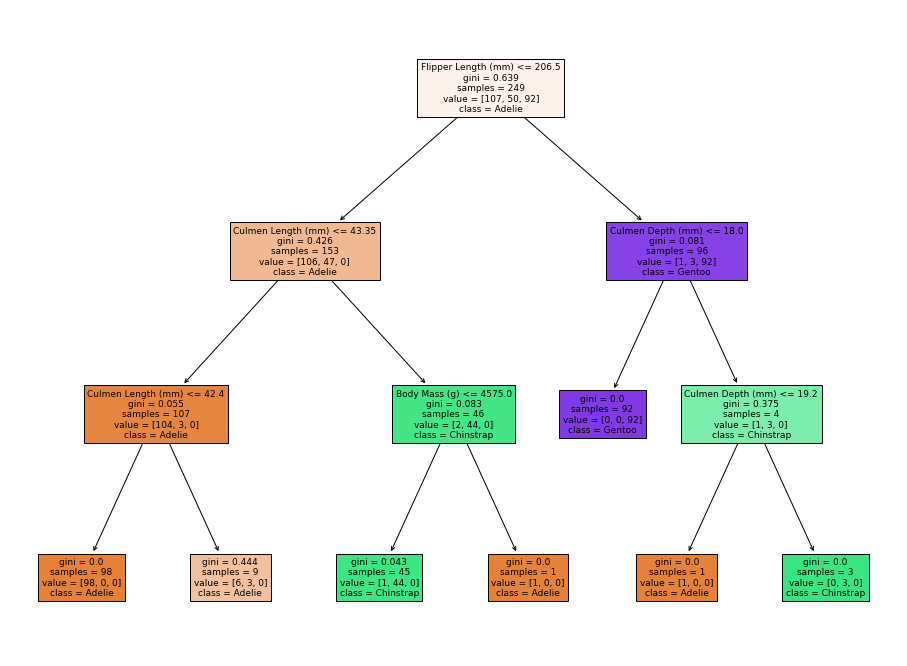

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 12))
t = plot_tree(m, feature_names=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)'], class_names=["Adelie", "Chinstrap", "Gentoo"], filled=True)

### Train a Random Forest from Scratch

#### 4. Build a list of trees

Repeat the following 100 times:
    
* draw 50 random penguins (with `df.sample()`)
* train a decision tree on the sample with `max_depth=3`
* add the tree to the forest

In [17]:
forest = []

for i in range(100):
    sample = train.sample(50)
    X = sample[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
    y = sample['Species']
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X,y)
    forest.append(tree)
    

In [18]:
forest[0].score(Xtrain, ytrain)

0.9558232931726908

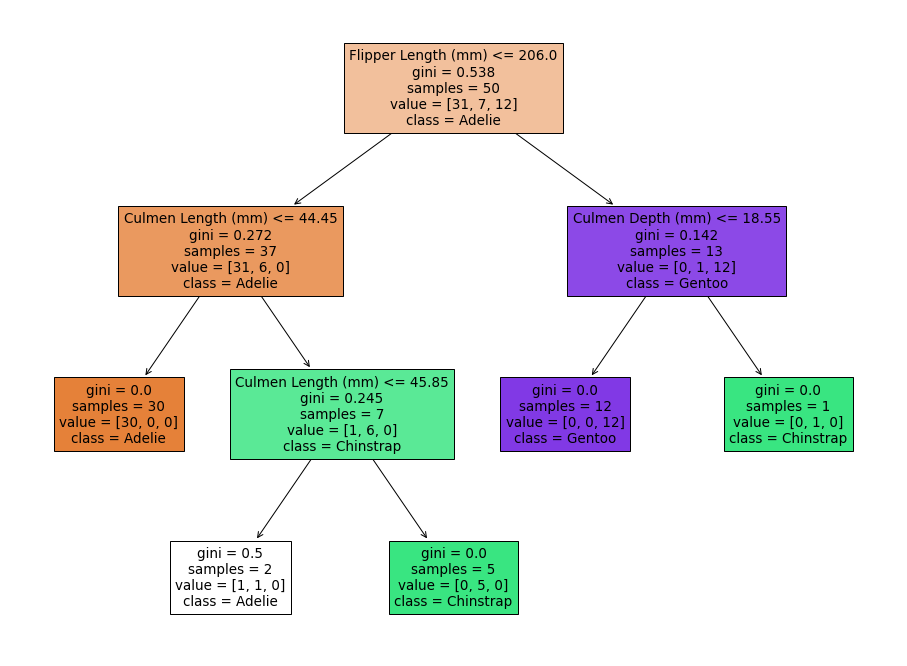

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 12))
t = plot_tree(forest[0], feature_names=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)'], class_names=["Adelie", "Chinstrap", "Gentoo"], filled=True)

In [34]:
forest[12].score(Xtrain, ytrain)

0.891566265060241

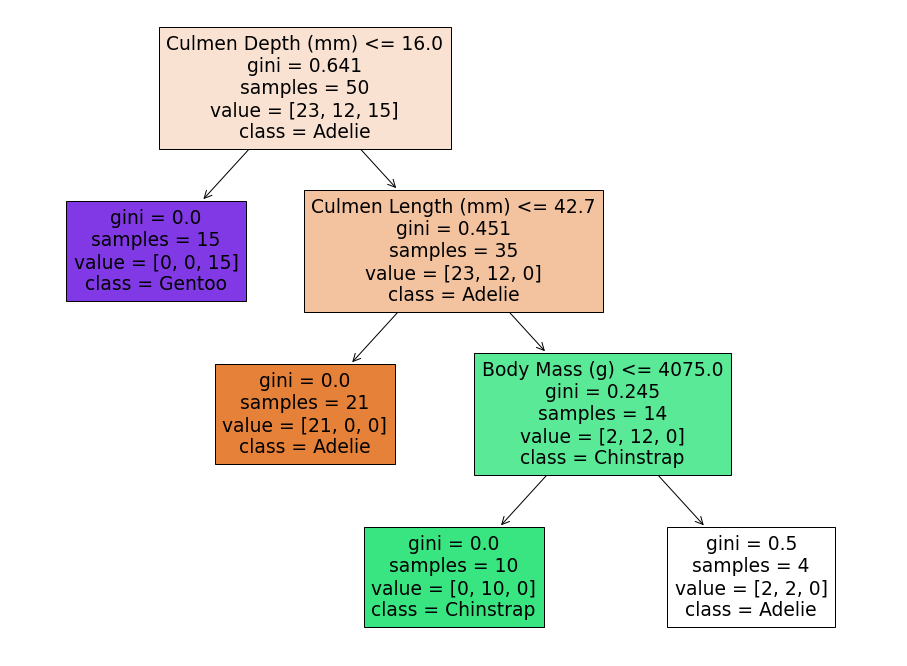

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 12))
t = plot_tree(forest[12], feature_names=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)'], class_names=["Adelie", "Chinstrap", "Gentoo"], filled=True)

#### 5. Calculate a list of training scores for all trees on the full training set

In [35]:
trainscores = [tree.score(Xtrain, ytrain) for tree in forest]

max(trainscores), min(trainscores)

(0.9718875502008032, 0.8273092369477911)

#### 6. Calculate the mean training score
is the mean score better or worse than the baseline?

In [36]:
print('mean train acc ', round(sum(trainscores)/len(trainscores), 3))

mean train acc  0.931


#### 7. Calculate the mean test score in the same way
is the mean score better or worse than the baseline?

In [37]:
testscores = [tree.score(Xtest, ytest) for tree in forest]
print('mean test acc ', round(sum(testscores)/len(testscores), 3))


mean test acc  0.909


### Majority Vote

#### 8. Create a list of predictions for every tree

In [38]:
preds = [tree.predict(Xtest) for tree in forest]
len(preds)

100

#### 9. Convert the list into a DataFrame
Inspect the result

* The shape of the DF should be (100, 84)
* What do the dimensions of the DF mean?
* Do the trees predictions are in agreement?

In [39]:
all_preds = pd.DataFrame(preds)
all_preds.shape
all_preds.head(105)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,Gentoo,Adelie,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
1,Gentoo,Chinstrap,Adelie,Gentoo,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
2,Gentoo,Chinstrap,Adelie,Adelie,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
3,Gentoo,Chinstrap,Adelie,Chinstrap,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
4,Chinstrap,Chinstrap,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gentoo,Chinstrap,Adelie,Gentoo,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
96,Gentoo,Chinstrap,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
97,Gentoo,Chinstrap,Adelie,Gentoo,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Adelie,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap
98,Gentoo,Chinstrap,Adelie,Gentoo,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Chinstrap,...,Adelie,Adelie,Gentoo,Chinstrap,Adelie,Adelie,Gentoo,Adelie,Gentoo,Chinstrap


#### 10. Calculate accuracy from most frequent prediction on each data point
* Is the overall accuracy better than the accuracy of the baseline?
* Do you have more or less overfitting?

In [40]:
ypred = all_preds.mode().T
ypred

,0
0,Gentoo
1,Chinstrap
2,Adelie
3,Gentoo
4,Chinstrap
...,...
79,Adelie
80,Gentoo
81,Adelie
82,Gentoo


In [41]:
ypred = all_preds.mode().T[0]
print('majority vote test score:', accuracy_score(ypred, ytest))

majority vote test score: 0.9523809523809523


## RandomForest with Scikit

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [44]:
importance=rf.feature_importances_

In [45]:
list(zip(importance, Xtrain.columns))

[(0.27174824935406594, 'Culmen Length (mm)'),
 (0.10585192230700277, 'Culmen Depth (mm)'),
 (0.609659475395054, 'Flipper Length (mm)'),
 (0.012740352943877159, 'Body Mass (g)')]

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Culmen Length (mm)'>

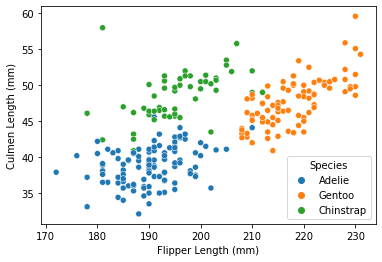

In [46]:
import seaborn as sns
sns.scatterplot(x=Xtrain['Flipper Length (mm)'], y=Xtrain['Culmen Length (mm)'], hue=ytrain)

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

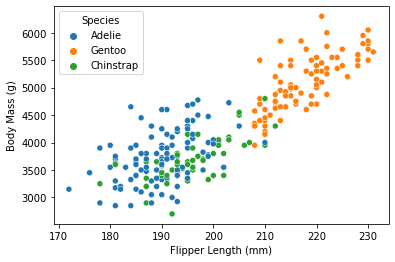

In [47]:
import seaborn as sns
sns.scatterplot(x=Xtrain['Flipper Length (mm)'], y=Xtrain['Body Mass (g)'], hue=ytrain)